<a href="https://colab.research.google.com/github/srisri2004/DAUP/blob/main/Lab_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following code simulates machine failures and missed diagnoses, performs hypothesis testing for a new protocol, and visualizes the distribution of failures.

A. Results
----------------------------------
Mean failures/day: 0.7886
Mean missed diagnoses/day: 9.4718
Probability missed diagnoses > 40: 0.0138

B. Hypothesis Testing
----------------------------------
Sample failure rate: 0.044444444444444446
Exact binomial test p-value: 0.731767038249019
One-sample z-test p-value: 0.5604637748455145
Bootstrap 95% CI: [0.         0.11111111]

Effect Size: 0.004444444444444445
Bootstrap Power Estimate: 0.2774


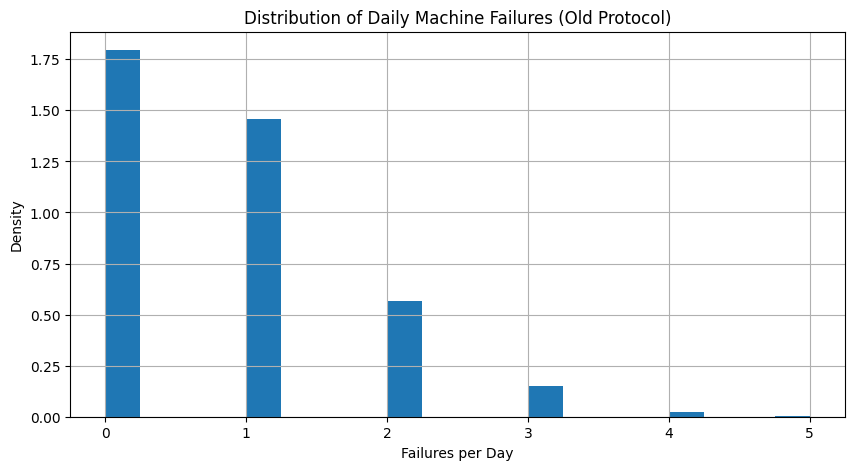

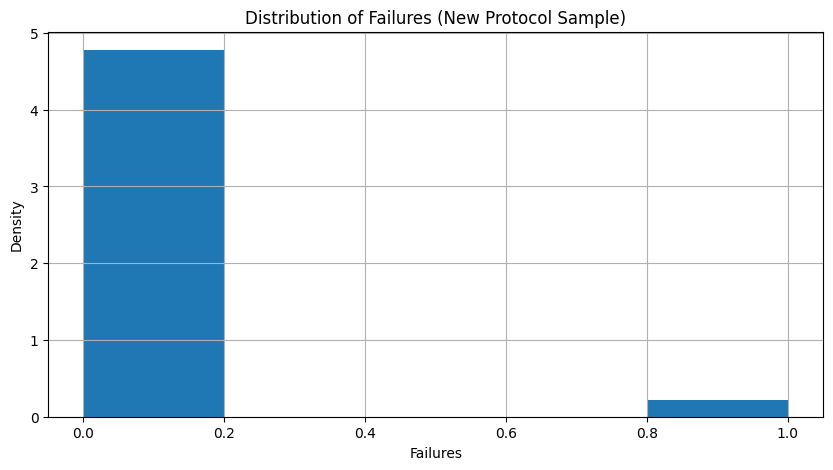

In [ ]:
import numpy as np
imp matplotlib.pyplot as pltfrom scipy.stats import norm, binomtestp_fail = 0.04lam_missed = 12machines = 20days = 5000np.random.seed(42)failures = np.random.binomial(machines, p_fail, size=days)missed = np.array([np.sum(np.random.poisson(lam_missed, f)) for f in failures])mean_fail = np.mean(failures)mean_missed = np.mean(missedort matplotlib.pyplot as plt
from scipy.stats import norm, binomtest

p_fail = 0.04
lam_missed = 12
machines = 20
days = 5000

np.random.seed(42)

failures = np.random.binomial(machines, p_fail, size=days)
missed = np.array([np.sum(np.random.poisson(lam_missed, f)) for f in failures])

mean_fail = np.mean(failures)
mean_missed = np.mean(missed)
prob_over_40 = np.mean(missed > 40)

print("A. Results")
print("----------------------------------")
print("Mean failures/day:", mean_fail)
print("Mean missed diagnoses/day:", mean_missed)
print("Probability missed diagnoses > 40:", prob_over_40)

sample_days = 45
sample_failures = np.random.binomial(1, p_fail, size=sample_days)
sample_rate = np.mean(sample_failures)

exact_p = binomtest(np.sum(sample_failures), sample_days, p_fail, alternative='less').pvalue
z_stat = (sample_rate - p_fail) / np.sqrt(p_fail*(1-p_fail)/sample_days)
z_p = norm.cdf(z_stat)

B = 5000
boot_props = []
for _ in range(B):
    s = np.random.choice(sample_failures, size=sample_days, replace=True)
    boot_props.append(np.mean(s))
boot_ci = np.percentile(boot_props, [2.5, 97.5])

print("\nB. Hypothesis Testing")
print("----------------------------------")
print("Sample failure rate:", sample_rate)
print("Exact binomial test p-value:", exact_p)
print("One-sample z-test p-value:", z_p)
print("Bootstrap 95% CI:", boot_ci)

effect_size = (sample_rate - p_fail)
within = np.mean(np.abs(np.array(boot_props) - p_fail) < 0.01)
power_estimate = within

print("\nEffect Size:", effect_size)
print("Bootstrap Power Estimate:", power_estimate)

plt.figure(figsize=(10,5))
plt.hist(failures, bins=20, density=True)
plt.title("Distribution of Daily Machine Failures (Old Protocol)")
plt.xlabel("Failures per Day")
plt.ylabel("Density")
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.hist(sample_failures, bins=5, density=True)
plt.title("Distribution of Failures (New Protocol Sample)")
plt.xlabel("Failures")
plt.ylabel("Density")
plt.grid()
plt.show()